<a href="https://colab.research.google.com/github/souvikg544/CodeNCollab/blob/main/selective_blurring_on_selected_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/image-1.jpg")
img1 = cv2.resize(img, (512, 512),
               interpolation = cv2.INTER_NEAREST)
cv2.imwrite("image_resized.jpg",img1)
blurred_img = cv2.GaussianBlur(img1, (21, 21), 20)

In [ ]:
img1.shape

(512, 512, 3)

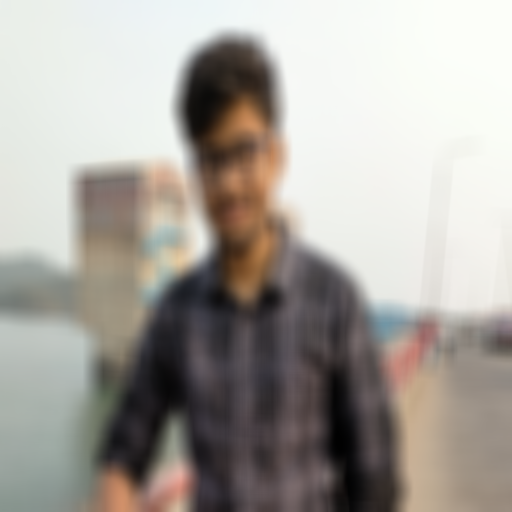

In [ ]:
cv2_imshow(blurred_img)

In [ ]:
mask = np.zeros((512, 512, 3), dtype=np.uint8)

In [ ]:
#mask = cv2.circle(mask, (258, 258), 100, (255, 255, 255), -1)

In [ ]:
mask.shape

(512, 512, 3)

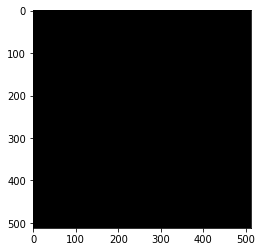

In [ ]:
plt.imshow(mask)

In [ ]:
# out = np.where(mask==np.array([255,255, 255]), img1, blurred_img)
# cv2.imwrite("./out.png", out)

In [ ]:
pip install imageai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 7.6 MB/s 
     |████████████████████████████████| 14.9 MB 52.3 MB/s 
     |████████████████████████████████| 2.1 MB 48.4 MB/s 
     |████████████████████████████████| 2.9 MB 35.3 MB/s 
     |████████████████████████████████| 11.6 MB 40.0 MB/s 
     |████████████████████████████████| 26.1 MB 1.2 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=c2354ab3d031fd3b7d8610bc4e4318b66d9f0456c3b6a4e56e33ded9d1bd15bf
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scip

In [ ]:
pip install tensorflow==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 15 kB/s 
     |████████████████████████████████| 132 kB 49.5 MB/s 
     |████████████████████████████████| 462 kB 33.1 MB/s 
     |████████████████████████████████| 3.8 MB 36.9 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=2238cb269420e0ebd60f93928b385b295e762e7c5cc0a06bacf44510e247cf24
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.47.0
    Uninstalling grpcio-1.47.0:
      Successfully uninstalled grpcio-1.47.0
  Attempting uninstall: ab

In [ ]:
pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imageai.Detection import ObjectDetection

detector = ObjectDetection()

In [ ]:
#!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5/  

In [ ]:
detector.setModelTypeAsYOLOv3()

In [ ]:
detector.setModelPath("/content/drive/MyDrive/whilter_videos/yolo.h5")

In [ ]:
detector.loadModel()

In [ ]:
detections, extracted_objects = detector.detectObjectsFromImage(input_image="/content/image_resized.jpg", output_image_path="/content/image2.jpg", extract_detected_objects=True, minimum_percentage_probability=30)

In [ ]:
extracted_objects

['/content/image2.jpg-objects/person-1.jpg',
 '/content/image2.jpg-objects/car-2.jpg',
 '/content/image2.jpg-objects/truck-3.jpg',
 '/content/image2.jpg-objects/person-4.jpg',
 '/content/image2.jpg-objects/person-5.jpg',
 '/content/image2.jpg-objects/car-6.jpg']

In [ ]:
detections

[{'box_points': [81, 52, 412, 521],
  'name': 'person',
  'percentage_probability': 99.76924061775208},
 {'box_points': [470, 332, 486, 350],
  'name': 'car',
  'percentage_probability': 71.68918251991272},
 {'box_points': [485, 322, 513, 362],
  'name': 'truck',
  'percentage_probability': 47.679221630096436},
 {'box_points': [421, 322, 437, 377],
  'name': 'person',
  'percentage_probability': 95.37909626960754},
 {'box_points': [439, 326, 452, 369],
  'name': 'person',
  'percentage_probability': 96.83181047439575},
 {'box_points': [486, 327, 513, 363],
  'name': 'car',
  'percentage_probability': 79.53535914421082}]

In [ ]:
detections[0]

{'box_points': [81, 52, 412, 521],
 'name': 'person',
 'percentage_probability': 99.76924061775208}

In [ ]:
person1=detections[0]

In [ ]:
x,y,x1,y1=person1['box_points']

In [ ]:
mask = cv2.rectangle(mask,(x,y), (x1,y1),(255, 255, 255) , -1)

In [ ]:
out = np.where(mask==np.array([255,255, 255]), img1, blurred_img)
cv2.imwrite("./out.png", out)

True

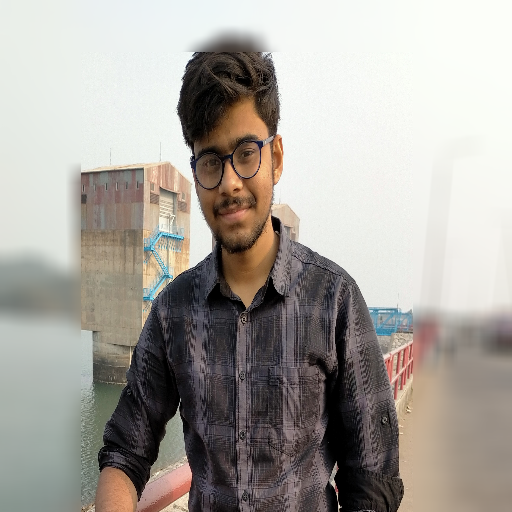

In [ ]:
cv2_imshow(out)

In [ ]:
cropped_image = img1[y:y1,x:x1]

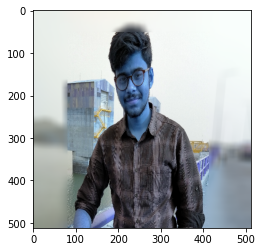

In [ ]:
plt.imshow(out)

In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
for det in detections:
  if det['name']=='person':
    x,y,x1,y1=det['box_points']
    crp_img = img1[y:y1,x:x1]
    if()



In [ ]:
dbimg=cv2.imread("/content/InterviewImage.jpg") # Refers to the image to be used to match. This image will be stored in the database
test_img=cropped_image

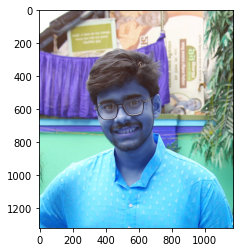

In [ ]:
plt.imshow(dbimg)

In [ ]:
plt.implot()

In [ ]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]
result = DeepFace.verify(dbimg,cropped_image,model_name = models[0])

ValueError: ignored

In [ ]:
result

{'detector_backend': 'opencv',
 'distance': 0.13470004689233162,
 'model': 'VGG-Face',
 'similarity_metric': 'cosine',
 'threshold': 0.4,
 'verified': True}

In [ ]:
obj = DeepFace.analyze(img, actions = ['emotion'])